## 2A

In [1]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
house_train = np.loadtxt("train.txt")
house_test = np.loadtxt("test.txt")

X_train = house_train[:, :-1]
X_test = house_test[:, :-1]

y_train = house_train[:, -1]
y_test = house_test[:, -1]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [3]:
alpha_values = np.arange(0.01, 10, 0.2)
test_mses = []

for alpha in alpha_values:
    #print(f"Testing alpha = {alpha}")

    lasso_model = Lasso(alpha=alpha, random_state=42)
    lasso_model.fit(X_train_scaled, y_train)
    y_test_pred = lasso_model.predict(X_test_scaled)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_mses.append(test_mse)

    #print(f"Alpha = {alpha} : Test MSE = {test_mse}")

optimal_idx = np.argmin(test_mses)
optimal_alpha = alpha_values[optimal_idx]
optimal_mse = test_mses[optimal_idx]

print("----------RESULT----------")
print(f"Optimal Alpha: {optimal_alpha:.3f} with Test MSE: {optimal_mse:.3f}")

----------RESULT----------
Optimal Alpha: 2.010 with Test MSE: 21.467


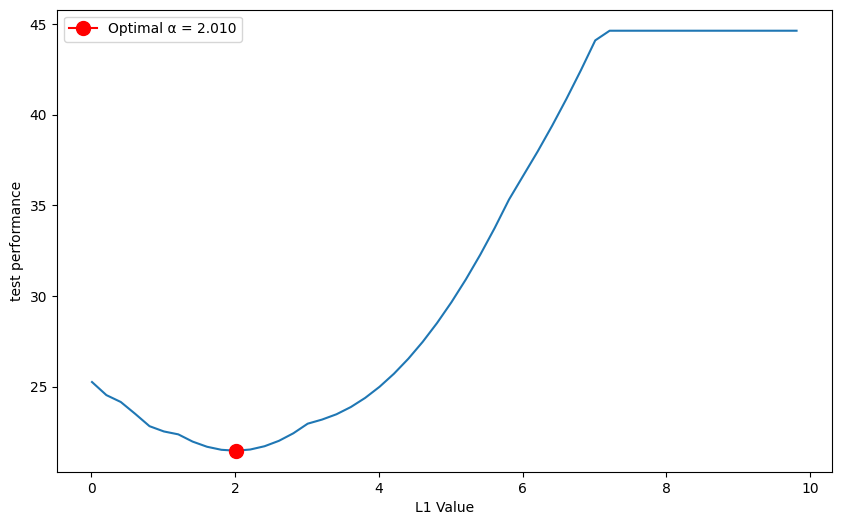

In [4]:
plt.figure(figsize=(10,6))
plt.plot(alpha_values, test_mses)
plt.plot(optimal_alpha, optimal_mse, marker='o', markersize=10, color='red', label=f'Optimal α = {optimal_alpha:.3f}')

plt.xlabel("L1 Value")
plt.ylabel("test performance")
plt.legend()

plt.show()

By the graph we can say that Optimal Configuration would be:
$$ \alpha = 2.010 $$
and Test MSE is 21.467

## 2B

In [5]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

In [6]:
categories = ["alt.atheism", "comp.graphics", "comp.os.ms-windows.misc",
              "comp.sys.ibm.pc.hardware", "rec.autos", "rec.motorcycles",
              "sci.crypt", "sci.electronics"]

ng_train = fetch_20newsgroups(subset="train", categories=categories)
ng_test = fetch_20newsgroups(subset="test", categories=categories)

In [7]:
ng_train

{'data': ['From: studner@rintintin.Colorado.EDU (STUDNER  ROGER ALAN)\nSubject: Modem for Sale\nNntp-Posting-Host: rintintin.colorado.edu\nOrganization: University of Colorado, Boulder\nLines: 4\n\nI am selling a USR HST 14.4k baud modem with v42bis compression upgrades.\nTHere is no manual, as it was lost going from one side of the U.S. to the other at some point.  THe modem is setup for max throughput, and it has built in help, but a quick reference guide on the bottom of it, so its use it not difficult by any means.\nAny offers?\n\n',
  'From: jmains@engr.latech.edu (John P. Mains)\nSubject: Electrical Properties of ELASTOMERS\nOrganization: Louisiana Tech University\nLines: 13\nDistribution: usa\nReply-To: jmains@engr.latech.edu\nNNTP-Posting-Host: altair.engr.latech.edu\n\n\nHello,\n\nI am looking for carbon-doped rubber.    Or an highly elastic material that changes its resistivity, or some\nother electrical property when streched.\n\nIf you could email me any info you may have o

In [8]:
vectorizer = TfidfVectorizer(max_features=10000, stop_words="english")
X_train = vectorizer.fit_transform(ng_train.data)
X_test = vectorizer.transform(ng_test.data)

y_train = ng_train.target
y_test = ng_test.target

print(f"Training data's shape: {X_train.shape}")
print(f"Test data's shape: {X_test.shape}")

Training data's shape: (4623, 10000)
Test data's shape: (3077, 10000)


this has created a matrix where each row is a doc and each col is a word and has tf-idf scores as values

In [9]:
l1_one_vs_rest = OneVsRestClassifier(LogisticRegression(penalty="l1", solver="liblinear", C=1.0, random_state=42))

l1_one_vs_rest.fit(X_train, y_train)

print(f"Number of binary estimators: {len(l1_one_vs_rest.estimators_)}")

Number of binary estimators: 8


In [10]:
# extracting coefficients from all binary classifiers:
all_coefs = []
for estimator in l1_one_vs_rest.estimators_:
    all_coefs.append(np.abs(estimator.coef_[0]))

all_coefs = np.array(all_coefs)
averaged_coefs = np.mean(all_coefs, axis=0)

print(f"Coefficient shape per classifier: {all_coefs[0].shape}")
print(f"Averaged coefficients shape: {averaged_coefs.shape}")

Coefficient shape per classifier: (10000,)
Averaged coefficients shape: (10000,)


In [11]:
# Index of top 200 features based on averaged coefficients:
top_200_indices = np.argsort(averaged_coefs)[-200:]

print(f"200 Features Selected are: {top_200_indices}")

200 Features Selected are: [4186 7827 6129 5893 7638 6097 1707 7127 7910 5189 2667 8868 3237  617
 2586 6256 8351 2294 8780 3526  982 1189 6003 4904 1329 5760 1867 9905
 8056 9698 1697 7715 7238 2762 1700 9193 1104 7845 1214 2101 5293 6085
 1996 3862 9652 2610 3021 8397 8416 9195 4304 9707 2351 1488 6386 5311
 3154 4533 4492 7507 4105 2756 6755 1752 5453 4222 4980 7329 9226 6348
 9703 2145 9282 3374 4959 6811 9457 5440 9066 6073 8898 6499 9439 1663
 7333 1745 3874 3769 2206 9560 5740 1192 1666 1974 2598 6754 5844 3206
 3099 1442  753 4239 1469 1771  493  477 4614 2270 6968 5668 9288 9689
 4919 2978 4410 1801 8722 3885 9858  316 2959 7649 6077 9101 7664 6045
 9059 7351 2330 2865 6942 8901 4032 1903 3836 1205 6505 1239 6029 6953
 8622 7505 1675 7000 9712 9178 7003 2773 9688 5478 3418 1645 2189 2719
 9493 7930 3368 6062 6031 8842 4658 4656 9588 2015  428 7648 6382 1457
 1468 2362 8975 2716 5132 3766 2218 7974 6830 4163 6072 4920 1409 2229
  426 3204 1686 7653 9789 6780 1411 2038 3405 8733

Rebuilding dataset with only the top 200 features and new L1 model

In [12]:
X_train_200 = X_train[:, top_200_indices]
X_test_200 = X_test[:, top_200_indices]

l1_model_200 = OneVsRestClassifier(LogisticRegression(penalty="l1", solver="liblinear", C=1.0, random_state=42))
l1_model_200.fit(X_train_200, y_train)

,estimator,LogisticRegre...r='liblinear')
,n_jobs,None
,verbose,0
,penalty,'l1'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42


In [13]:
#evaluation of results:
y_train_pred = l1_model_200.predict(X_train_200)
y_test_pred = l1_model_200.predict(X_test_200)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

class_names = ng_train.target_names

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"\nPer-class Test Results:")
print(classification_report(y_test, y_test_pred, target_names=class_names))

Training Accuracy: 0.8583
Test Accuracy: 0.7894

Per-class Test Results:
                          precision    recall  f1-score   support

             alt.atheism       0.94      0.84      0.89       319
           comp.graphics       0.81      0.74      0.77       389
 comp.os.ms-windows.misc       0.80      0.72      0.76       394
comp.sys.ibm.pc.hardware       0.74      0.72      0.73       392
               rec.autos       0.87      0.79      0.83       396
         rec.motorcycles       0.92      0.88      0.90       398
               sci.crypt       0.94      0.87      0.90       396
         sci.electronics       0.50      0.75      0.60       393

                accuracy                           0.79      3077
               macro avg       0.82      0.79      0.80      3077
            weighted avg       0.81      0.79      0.80      3077

